**PROBLEM STATEMENT for K-NN:**

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

Create classification model using KNN.  Identify the optimum no of neighbors and dimensions for your model.

Justify if KNN model should be considered or not for the problem statement.

evaluation will be based on..

1)  Handling of missing values, outliers, if any .

2)  Identifying data and model issues if any.

3) Choice of packages and distance measure used. justify your answer.

4) Selection of train, test split.

5) Final model creation and accuracy matrix selected for the model.

6) Future scope of the work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('parkinsons.data', sep=",")
pd.set_option('max_columns', 25)
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
data.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S08_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


In [5]:
# As we can see 'name' column has 100% uniqueness, we are dropping the 'name' column

data.drop('name', axis=1, inplace=True)

### Missing value treatment

In [6]:
data.isna().mean().round(4)*100

MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

* we have no missing value in the dataset

### Duplicates treatment

In [7]:
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')

Number of duplicate rows = 0


* We have no duplicates

### Feature Selection

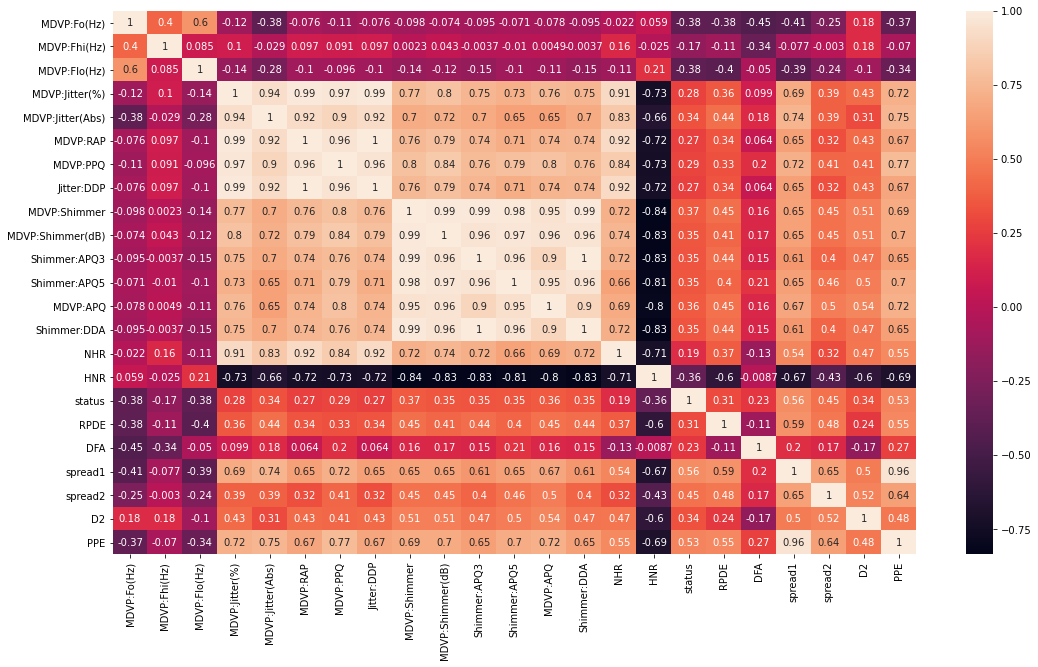

In [8]:
plt.rcParams['figure.figsize']=18,10

sns.heatmap(data.corr(), annot=True)

* In this correlation heatmap, we can see that many independent features are highly correlated with eachother. So, to omit multicolinearity let's work on features. 

In [9]:
x=data.drop('status', axis=1)
y=data['status']

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

model=RandomForestClassifier(max_depth=5)

boruta = BorutaPy(estimator=model, n_estimators = 'auto',
                 max_iter = 100, random_state = 0)

boruta.fit(np.array(x), np.array(y))

best_features = x.columns[boruta.support_].to_list()
print(best_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'spread1', 'spread2', 'D2', 'PPE']


In [10]:
data_fs = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
                'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                'MDVP:Shimmer', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',
                'NHR', 'spread1', 'spread2', 'D2', 'PPE', 'status']]

### Outlier Treatment

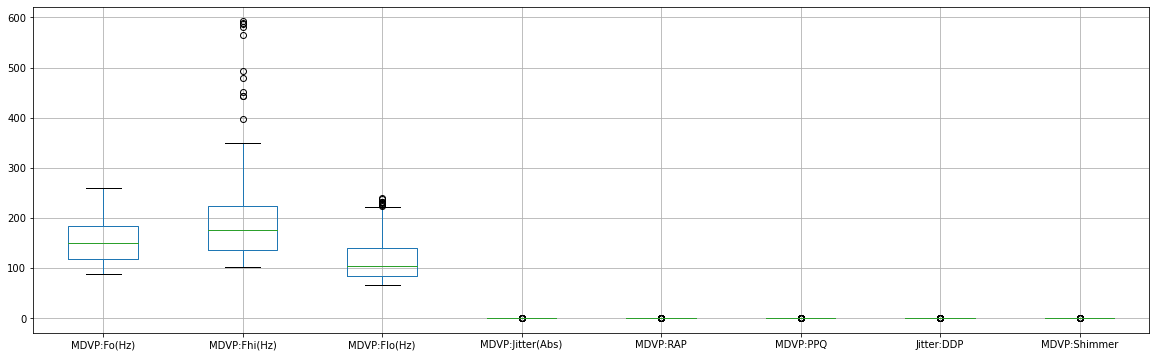

In [11]:
data_fs.iloc[:, :8].boxplot(figsize=(20,6))

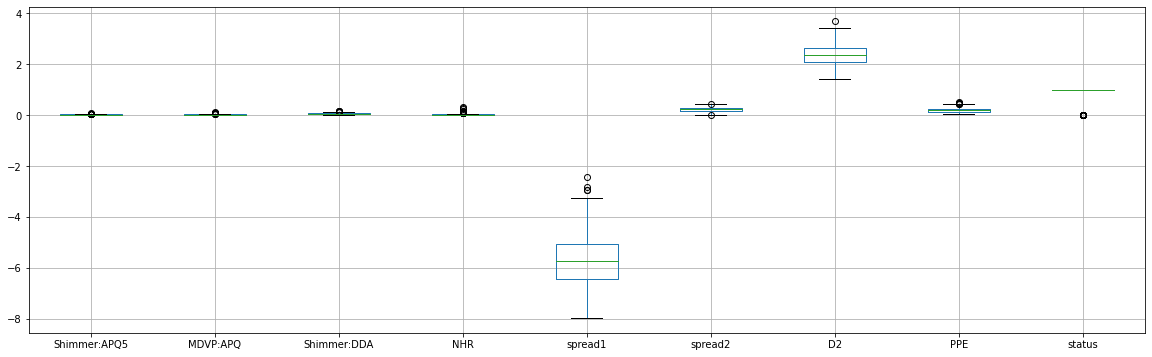

In [12]:
data_fs.iloc[:, 8:].boxplot(figsize=(20,6))

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_ro= data_fs[~((data_fs < (Q1 - 1.5 * IQR)) |(data_fs > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-13-0a1f7d6525f3>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_ro= data_fs[~((data_fs < (Q1 - 1.5 * IQR)) |(data_fs > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-13-0a1f7d6525f3>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_ro= data_fs[~((data_fs < (Q1 - 1.5 * IQR)) |(data_fs > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
print(data_ro.shape)
data_ro['status'].value_counts()

(114, 17)


1    114
Name: status, dtype: int64

It seems like removing outliers is removing all the data related to '0' class. So there is no meaning of moving further with outlier removed data. So we are keeping outliers for our model

### Imbalance treatment

In [15]:
healthy = data_fs[data_fs['status']==0]
not_healthy=data_fs[data_fs['status']==1]

In [16]:
print(healthy.shape, not_healthy.shape)

(48, 17) (147, 17)


* We have huge imbalance in data

In [17]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
sm.fit(data_fs.iloc[:,:-1], data_fs['status'])
X_resampled, y_resampled = sm.fit_resample(data_fs.iloc[:,:-1], data_fs['status'])

### Data splitting

In [18]:
from sklearn.model_selection import train_test_split

#train and validation data 
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=12)


#lets create testing data from the orginal data before doing over sampling
data_test_0 = data_fs[data_fs['status']==0].sample(15)
data_test_1 = data_fs[data_fs['status']==1].sample(25)
data_test = pd.concat([data_test_0, data_test_1], ignore_index=True)

X_test=data_test.drop('status', axis=1)
y_test=data_test['status']

In [19]:
X_train.shape, X_val.shape, X_test.shape

((220, 16), (74, 16), (40, 16))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_val_scl = scaler.transform(X_val)

X_test_scl = scaler.transform(X_test)

# KNN Model building 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#let's find optimized n_neighbour value

error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scl,y_train)
    pred_i = knn.predict(X_val_scl)
    error_rate.append(np.mean(pred_i != y_val))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Error Rate')

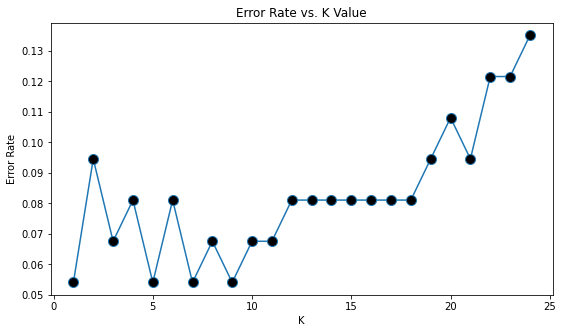

In [23]:
plt.figure(figsize=(9,5))
plt.plot(range(1,25),error_rate, marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that if the number of neighbors value increases more than 9, the error rate also increases. So we are choosing 9 as the n_neighbors value.

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scl,y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
y_val_pred = knn.predict(X_val_scl)

### Accuracy matrics of KNN with validation data

In [26]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

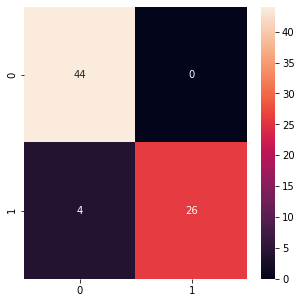

In [27]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_val,y_val_pred), annot=True)

In [28]:
print(accuracy_score(y_val, y_val_pred))
print(classification_report(y_val,y_val_pred))

0.9459459459459459
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.87      0.93        30

    accuracy                           0.95        74
   macro avg       0.96      0.93      0.94        74
weighted avg       0.95      0.95      0.95        74



### Predict with test data using KNN

In [29]:
y_test_pred = knn.predict(X_test_scl)

### Accuracy metrics of KNN with test data

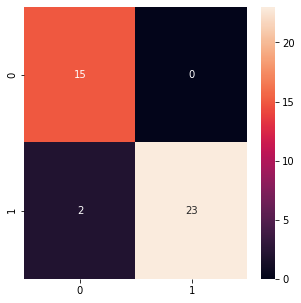

In [30]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [31]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test,y_test_pred))

0.95
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.92      0.96        25

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



# Random Forest model building

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_val_pred2 = RF.predict(X_val)

### Accuracy matrics of RF with validation data

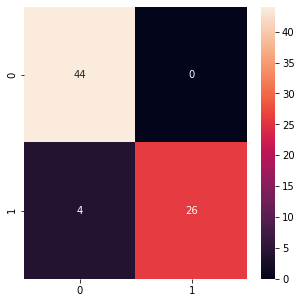

In [33]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_val,y_val_pred2), annot=True)

In [34]:
print(accuracy_score(y_val, y_val_pred2))
print(classification_report(y_val,y_val_pred2))

0.9459459459459459
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.87      0.93        30

    accuracy                           0.95        74
   macro avg       0.96      0.93      0.94        74
weighted avg       0.95      0.95      0.95        74



### Predict with test data using RF

In [35]:
y_test_pred2 = RF.predict(X_test)

### Accuracy metrics of RF with test data

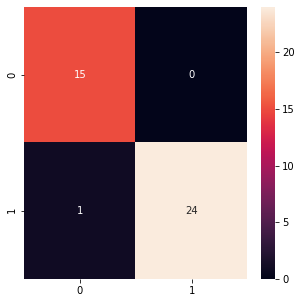

In [36]:
plt.rcParams['figure.figsize']=5,5
sns.heatmap(confusion_matrix(y_test,y_test_pred2), annot=True)

In [37]:
print(accuracy_score(y_test, y_test_pred2))
print(classification_report(y_test,y_test_pred2))

0.975
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        25

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

